In [96]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import glob

# 파일 경로 패턴 설정
file_pattern = '/content/drive/MyDrive/archive/cleaned_dataset/data/*.csv'

# 모든 파일 경로 불러오기
all_files = glob.glob(file_pattern)

# 제거할 컬럼과 필요한 컬럼 설정
columns_to_remove = ['Sense_current', 'Battery_current', 'Current_ratio', 'Battery_impedance', 'Rectified_Impedance']
required_columns = ['Voltage_measured', 'Current_measured', 'Temperature_measured', 'Current_load', 'Voltage_load', 'Time']

# 각 파일을 읽어와 데이터프레임 리스트에 저장
df_list = []
for file in all_files:
    df = pd.read_csv(file)
    # 제거할 컬럼이 존재하는 경우 삭제
    df.drop(columns=[col for col in columns_to_remove if col in df.columns], inplace=True)
    # 필요한 컬럼만 선택
    df = df[[col for col in required_columns if col in df.columns]]
    df_list.append(df)

# 모든 데이터프레임을 하나로 결합
combined_df = pd.concat(df_list, ignore_index=True)

# 결합된 데이터프레임의 내용 확인
print(combined_df.head())
print(combined_df.info())

# 메타데이터 파일 불러오기
metadata = pd.read_csv('/content/drive/MyDrive/archive/cleaned_dataset/metadata.csv')

# 메타데이터 내용 확인
print(metadata.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Voltage_measured  Current_measured  Temperature_measured    Time  \
0          3.477369          0.004685             33.895428   0.000   
1          3.163864         -3.576039             33.837296   2.469   
2          3.548105          1.518352             33.826236   8.141   
3          3.597406          1.515704             33.813143  13.672   
4          3.624396          1.516318             33.753983  19.234   

   Current_load  Voltage_load  
0           NaN           NaN  
1           NaN           NaN  
2           NaN           NaN  
3           NaN           NaN  
4           NaN           NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7376834 entries, 0 to 7376833
Data columns (total 6 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Voltage_measured      float64
 1   Current_measured      float64


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#사이클 구하기 위한 열 추출
filtered_metadata=metadata[metadata['type'] == 'discharge'][['battery_id', 'type', 'Capacity']]
filtered_metadata

,battery_id,type,Capacity
0,B0047,discharge,1.6743047446975208
4,B0047,discharge,1.5243662105099023
6,B0047,discharge,1.5080762969973425
8,B0047,discharge,1.4835577960067696
10,B0047,discharge,1.4671391666146525
...,...,...,...
7553,B0055,discharge,1.0285269676595319
7555,B0055,discharge,0.9816844358987022
7557,B0055,discharge,1.0127121434171131
7561,B0055,discharge,1.0201379996149256


In [ ]:
#사이클 수 구하기
filtered_metadata['cycle'] = filtered_metadata.groupby('battery_id').cumcount()
filtered_metadata

,battery_id,type,Capacity,cycle
0,B0047,discharge,1.6743047446975208,0
4,B0047,discharge,1.5243662105099023,1
6,B0047,discharge,1.5080762969973425,2
8,B0047,discharge,1.4835577960067696,3
10,B0047,discharge,1.4671391666146525,4
...,...,...,...,...
7553,B0055,discharge,1.0285269676595319,97
7555,B0055,discharge,0.9816844358987022,98
7557,B0055,discharge,1.0127121434171131,99
7561,B0055,discharge,1.0201379996149256,100


In [ ]:
#다시 인덱싱
filtered_metadata.reset_index(drop=True)
#drop=True하면 index 칼럼을 안 만듦

,battery_id,type,Capacity,cycle
0,B0047,discharge,1.6743047446975208,0
1,B0047,discharge,1.5243662105099023,1
2,B0047,discharge,1.5080762969973425,2
3,B0047,discharge,1.4835577960067696,3
4,B0047,discharge,1.4671391666146525,4
...,...,...,...,...
2789,B0055,discharge,1.0285269676595319,97
2790,B0055,discharge,0.9816844358987022,98
2791,B0055,discharge,1.0127121434171131,99
2792,B0055,discharge,1.0201379996149256,100


In [ ]:
# 'Capacity' 열을 숫자(float)로 변환
filtered_metadata['Capacity'] = pd.to_numeric(filtered_metadata['Capacity'], errors='coerce')

# 배터리 데이터에서 SOH 계산
# Qr: 배터리의 정격 용량 (2.0Ah)
Qr = 2.0

# SOH 계산: 현재 용량 / 정격 용량 * 100
filtered_metadata['SOH'] = (filtered_metadata['Capacity'] / Qr) * 100

# SOH 컬럼만 출력
filtered_metadata

,battery_id,type,Capacity,cycle,SOH
0,B0047,discharge,1.674305,0,83.715237
4,B0047,discharge,1.524366,1,76.218311
6,B0047,discharge,1.508076,2,75.403815
8,B0047,discharge,1.483558,3,74.177890
10,B0047,discharge,1.467139,4,73.356958
...,...,...,...,...,...
7553,B0055,discharge,1.028527,97,51.426348
7555,B0055,discharge,0.981684,98,49.084222
7557,B0055,discharge,1.012712,99,50.635607
7561,B0055,discharge,1.020138,100,51.006900


In [ ]:
filtered_metadata.reset_index(drop=True)

,battery_id,type,Capacity,cycle,SOH
0,B0047,discharge,1.674305,0,83.715237
1,B0047,discharge,1.524366,1,76.218311
2,B0047,discharge,1.508076,2,75.403815
3,B0047,discharge,1.483558,3,74.177890
4,B0047,discharge,1.467139,4,73.356958
...,...,...,...,...,...
2789,B0055,discharge,1.028527,97,51.426348
2790,B0055,discharge,0.981684,98,49.084222
2791,B0055,discharge,1.012712,99,50.635607
2792,B0055,discharge,1.020138,100,51.006900


In [ ]:
# battery_id 별로 데이터를 분리
battery_ids = [
    "B0033", "B0036", "B0034", "B0007", "B0005", "B0006", "B0018", "B0044",
    "B0043", "B0042", "B0054", "B0056", "B0055", "B0047", "B0048", "B0045",
    "B0046", "B0041", "B0053", "B0040", "B0039", "B0038", "B0030", "B0029",
    "B0031", "B0032", "B0026", "B0025", "B0028", "B0027", "B0049", "B0052",
    "B0051", "B0050"
]

# 각 배터리 ID 별로 데이터를 분리하여 출력
for battery_id in battery_ids:
    df_battery = filtered_metadata[filtered_metadata['battery_id'] == battery_id]
    print(f"Data for {battery_id}:")
    print(df_battery)
    print("\n")  # 각 배터리의 데이터를 분리해서 출력하기 위해 줄바꿈

Data for B0033:
     battery_id       type  Capacity  cycle        SOH
2412      B0033  discharge  0.068426      0   3.421286
2416      B0033  discharge  0.689570      1  34.478495
2418      B0033  discharge  1.161085      2  58.054241
2420      B0033  discharge  1.252939      3  62.646965
2422      B0033  discharge  1.302918      4  65.145900
...         ...        ...       ...    ...        ...
2886      B0033  discharge  1.328032    192  66.401624
2888      B0033  discharge  1.363455    193  68.172749
2890      B0033  discharge  1.329132    194  66.456584
2892      B0033  discharge  1.312420    195  65.621005
2894      B0033  discharge  1.315283    196  65.764128

[197 rows x 5 columns]


Data for B0036:
     battery_id       type  Capacity  cycle        SOH
3513      B0036  discharge  1.001983      0  50.099129
3517      B0036  discharge  1.801101      1  90.055038
3519      B0036  discharge  1.804423      2  90.221149
3521      B0036  discharge  1.804389      3  90.219442
3523   

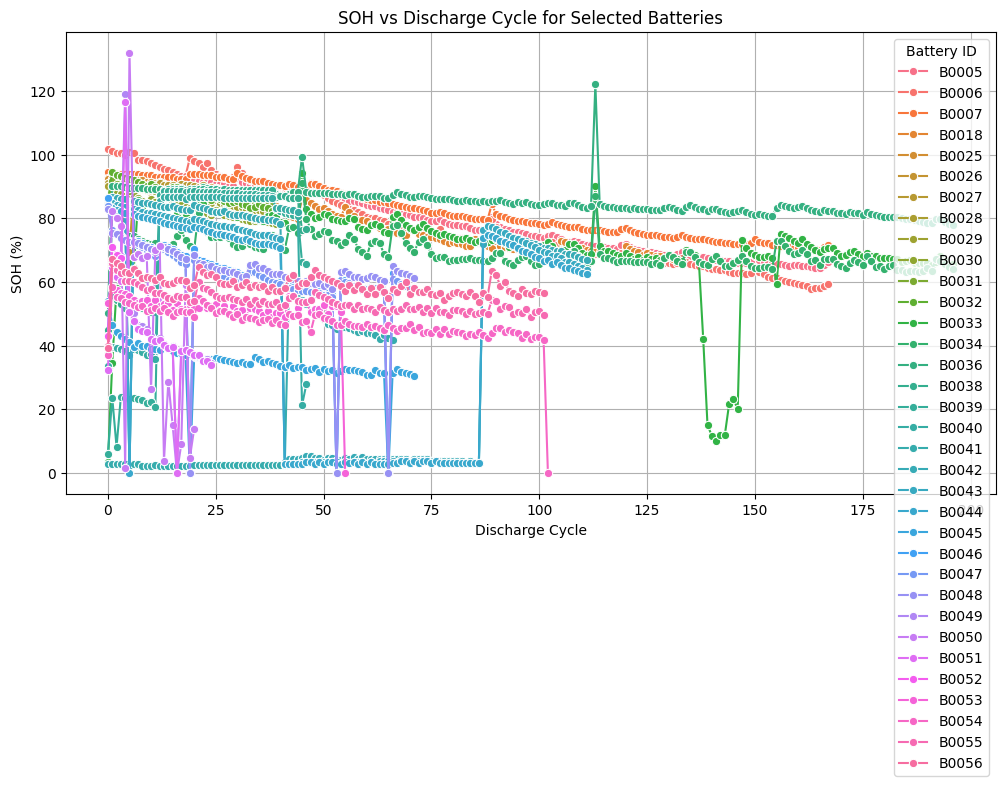

In [ ]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

# cycle로 그룹화하고 SOH의 평균 계산
grouped_data = filtered_metadata.groupby(['battery_id', 'cycle'])['SOH'].mean().reset_index()

# 그래프 그리기
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='cycle', y='SOH', hue='battery_id', marker='o')
plt.title('SOH vs Discharge Cycle for Selected Batteries')
plt.xlabel('Discharge Cycle')
plt.ylabel('SOH (%)')
plt.legend(title='Battery ID')
plt.grid(True)
plt.show()

In [ ]:
# SOH가 70% 이하로 떨어지는 cycle 찾기
soh_below_70 = filtered_metadata[filtered_metadata['SOH'] <= 70]

# 배터리 번호별로 cycle 추출
battery_cycles_below_70 = soh_below_70.groupby('battery_id')['cycle'].min().reset_index()

# 결과 출력
print(battery_cycles_below_70)

   battery_id  cycle
0       B0005    124
1       B0006    108
2       B0018     96
3       B0026      5
4       B0033      0
5       B0034      0
6       B0036      0
7       B0038      0
8       B0039      0
9       B0040      0
10      B0041      0
11      B0042      5
12      B0043      5
13      B0044      5
14      B0045      0
15      B0046     16
16      B0047      9
17      B0048     11
18      B0049      0
19      B0050      0
20      B0051      0
21      B0052      0
22      B0053      0
23      B0054      0
24      B0055      0
25      B0056      0


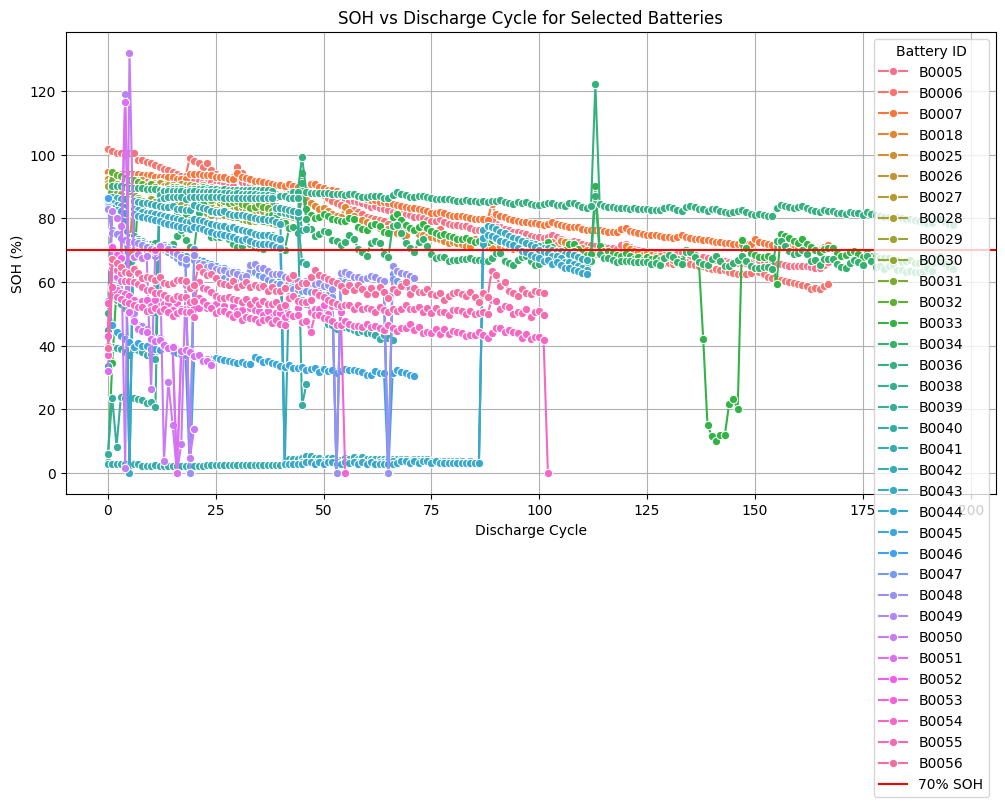

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# cycle로 그룹화하고 SOH의 평균 계산
grouped_data = filtered_metadata.groupby(['battery_id', 'cycle'])['SOH'].mean().reset_index()

# 그래프 그리기
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='cycle', y='SOH', hue='battery_id', marker='o')
plt.axhline(y=70, color='red', linestyle='-', label='70% SOH')
plt.title('SOH vs Discharge Cycle for Selected Batteries')
plt.xlabel('Discharge Cycle')
plt.ylabel('SOH (%)')
plt.legend(title='Battery ID')
plt.grid(True)
plt.show()

In [ ]:
#combined_data에서 임피던스 csv file 지우기

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import glob

# 파일 경로 패턴 설정
file_pattern = '/content/drive/MyDrive/archive/cleaned_dataset/data/*.csv'

# 모든 파일 경로 불러오기
all_files = glob.glob(file_pattern)

# 제거할 컬럼과 필요한 컬럼 설정
columns_to_remove = ['Sense_current', 'Battery_current', 'Current_ratio', 'Battery_impedance', 'Rectified_Impedance']
required_columns = ['Voltage_measured', 'Current_measured', 'Temperature_measured', 'Current_load', 'Voltage_load', 'Time']

# 각 파일을 읽어와 데이터프레임 리스트에 저장
df_list = []
for file in all_files:
    df = pd.read_csv(file)
    # 제거할 컬럼이 존재하는 경우 삭제
    df.drop(columns=[col for col in columns_to_remove if col in df.columns], inplace=True)
    # 필요한 컬럼만 선택
    df = df[[col for col in required_columns if col in df.columns]]
    # 파일명 열 추가
    df['filename'] = file.split('/')[-1]
    df_list.append(df)

# 모든 데이터프레임을 하나로 결합
combined_df = pd.concat(df_list, ignore_index=True)

# 결합된 데이터프레임의 내용 확인
print("Combined DataFrame:")
print(combined_df.head())
print(combined_df.info())

# 메타데이터 파일 불러오기
metadata = pd.read_csv('/content/drive/MyDrive/archive/cleaned_dataset/metadata.csv')

# 메타데이터 내용 확인
print("Metadata:")
print(metadata.head())

# 임피던스 행에 해당하는 파일명 추출
impedance_files = metadata[metadata['type'] == 'impedance']['filename'].tolist()

# combined_df에서 임피던스 파일 제거
combined_df = combined_df[~combined_df['filename'].isin(impedance_files)]

# filtered_metadata 정의 (임피던스 행을 제외한 metadata)
filtered_metadata = metadata[metadata['type'] != 'impedance']
filtered_metadata=metadata[metadata['type'] == 'discharge'][['battery_id', 'type', 'Capacity', 'test_id', 'filename']]
filtered_metadata['cycle'] = filtered_metadata.groupby('battery_id').cumcount()
# 'Capacity' 열을 숫자(float)로 변환
filtered_metadata['Capacity'] = pd.to_numeric(filtered_metadata['Capacity'], errors='coerce')

# 배터리 데이터에서 SOH 계산
# Qr: 배터리의 정격 용량 (2.0Ah)
Qr = 2.0

# SOH 계산: 현재 용량 / 정격 용량 * 100
filtered_metadata['SOH'] = (filtered_metadata['Capacity'] / Qr) * 100

# 필요 컬럼 선택 (metadata에서 필요한 컬럼 선택, 필요시 조정)
metadata_required_columns = ['battery_id', 'test_id', 'filename', 'Capacity', 'SOH']

filtered_metadata = filtered_metadata[metadata_required_columns]

# filtered_metadata와 combined_df 결합
combined_data = pd.merge(filtered_metadata, combined_df, on='filename', how='inner')

# 결합 후 데이터프레임 정보 출력
print("Combined data after excluding impedance files:")
print(combined_data.head())
print(f"Number of samples in combined data: {len(combined_data)}")

# NaN 값 제거
combined_data = combined_data.dropna()

# NaN 값 제거 후 데이터프레임 정보 출력
print("Combined data after dropping NaNs:")
print(combined_data.head())
print(f"Number of samples in combined data: {len(combined_data)}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-25-5f56b377e0dd>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['filename'] = file.split('/')[-1]
<ipython-input-25-5f56b377e0dd>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['filename'] = file.split('/')[-1]
<ipython-input-25-5f56b377e0dd>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

Combined DataFrame:
   Voltage_measured  Current_measured  Temperature_measured    Time  \
0          3.477369          0.004685             33.895428   0.000   
1          3.163864         -3.576039             33.837296   2.469   
2          3.548105          1.518352             33.826236   8.141   
3          3.597406          1.515704             33.813143  13.672   
4          3.624396          1.516318             33.753983  19.234   

    filename  Current_load  Voltage_load  
0  06567.csv           NaN           NaN  
1  06567.csv           NaN           NaN  
2  06567.csv           NaN           NaN  
3  06567.csv           NaN           NaN  
4  06567.csv           NaN           NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7376834 entries, 0 to 7376833
Data columns (total 7 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Voltage_measured      float64
 1   Current_measured      float64
 2   Temperature_measured  float64
 3   Tim

In [ ]:
battery_counts = filtered_metadata['battery_id'].value_counts()
battery_counts
#34종류, 2794개 데이터(70% 1956개, 838개) B0047까지 학습용데이터로사용하면 될듯(논문에서는 5,6,18을 70%로 설정)

In [98]:
#LSTM 모델
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# combined_data는 임피던스 파일을 제거한 후의 데이터입니다.

# 배터리 ID 목록
train_battery_ids = [
    "B0033", "B0036", "B0034", "B0007", "B0005", "B0006", "B0018", "B0044",
    "B0043", "B0042", "B0054", "B0056", "B0055", "B0047"
]

test_battery_ids = [
    "B0048", "B0045", "B0046", "B0041", "B0053", "B0040", "B0039", "B0038",
    "B0030", "B0029", "B0031", "B0032", "B0026", "B0025", "B0028", "B0027",
    "B0049", "B0052", "B0051", "B0050"
]

# 훈련 데이터와 테스트 데이터 분리
train_data = combined_data[combined_data['battery_id'].isin(train_battery_ids)]
test_data = combined_data[combined_data['battery_id'].isin(test_battery_ids)]

# 데이터가 비어있는지 확인
if train_data.empty or test_data.empty:
    raise ValueError("Train or Test data is empty. Please check the battery_id filtering.")

# 실제 열 이름에 맞춰 수정
features = ['Voltage_measured', 'Current_measured', 'Temperature_measured']
target = 'SOH'

# X, y 분리
X_train = train_data[features].values
y_train = train_data[target].values

X_test = test_data[features].values
y_test = test_data[target].values

# 데이터 정규화
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LSTM 입력 형태로 변환 (samples, timesteps, features)
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# LSTM 모델 구성
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# 모델 학습
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=2, shuffle=False)

# 예측
y_pred = model.predict(X_test_scaled)

# 결과 출력
for i in range(len(y_test)):
    print(f"Actual: {y_test[i]}, Predicted: {y_pred[i][0]}")

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Actual: 50.15560842406116, Predicted: 71.8784408569336
Actual: 50.15560842406116, Predicted: 71.8784408569336
Actual: 50.15560842406116, Predicted: 71.8784408569336
Actual: 50.15560842406116, Predicted: 71.8784408569336
Actual: 50.15560842406116, Predicted: 71.8784408569336
Actual: 50.15560842406116, Predicted: 71.8784408569336
Actual: 50.15560842406116, Predicted: 71.8784408569336
Actual: 50.15560842406116, Predicted: 71.8784408569336
Actual: 50.15560842406116, Predicted: 71.8784408569336
Actual: 50.15560842406116, Predicted: 71.8784408569336
Actual: 50.15560842406116, Predicted: 71.8784408569336
Actual: 50.15560842406116, Predicted: 71.8784408569336
Actual: 50.15560842406116, Predicted: 71.8784408569336
Actual: 50.15560842406116, Predicted: 71.8784408569336
Actual: 50.15560842406116, Predicted: 71.8784408569336
Actual: 50.15560842406116, Predicted: 71.8784408569336
Actual: 50.15560842406116, Predicted: 71.8784408569336
Actual: 50.15560842406116, Pr

In [99]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# 실제 값과 예측 값을 배열로 변환
actual_values = np.array([50.15560842406116] * len(y_pred))
predicted_values = np.array([pred[0] for pred in y_pred])

# 평균 절대 오차 (MAE)
mae = mean_absolute_error(actual_values, predicted_values)

# 평균 제곱근 오차 (RMSE)
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 20.113962251664283
Root Mean Squared Error (RMSE): 20.5392325939911


In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# 배터리 ID 목록
train_battery_ids = ['B0006', 'B0005']

test_battery_ids = [
    "B0005", "B0006", "B0007", "B0018", "B0025", "B0026", "B0027", "B0028",
    "B0029", "B0030", "B0031", "B0032", "B0033", "B0034", "B0036", "B0038",
    "B0039", "B0040", "B0041", "B0042", "B0043", "B0044", "B0045", "B0046",
    "B0047", "B0048", "B0049", "B0050", "B0051", "B0052", "B0053", "B0054",
    "B0055", "B0056"
]

# 훈련 데이터와 테스트 데이터 분리
train_data = combined_data[combined_data['battery_id'].isin(train_battery_ids)]
test_data = combined_data[combined_data['battery_id'].isin(test_battery_ids)]

# 특징과 목표 변수 분리
features = ['Voltage_measured', 'Current_measured', 'Temperature_measured']
target = 'SOH'

X_train = train_data[features].values
y_train = train_data[target].values

X_test = test_data[features].values
y_test = test_data[target].values

# 데이터 정규화
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# GRU 입력 형태로 변환 (samples, timesteps, features)
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# GRU 모델 구성
model = Sequential()
model.add(GRU(50, activation='relu', input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# 모델 학습
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=2, shuffle=False)

# 예측
y_pred = model.predict(X_test_scaled)

# 결과 출력
for i in range(len(y_test)):
    battery_id = test_data.iloc[i]['battery_id']
    print(f"Battery ID: {battery_id}, Actual: {y_test[i]}, Predicted: {y_pred[i][0]}")


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Battery ID: B0055, Actual: 50.19971120101915, Predicted: 53.91191864013672
Battery ID: B0055, Actual: 50.19971120101915, Predicted: 53.814720153808594
Battery ID: B0055, Actual: 50.19971120101915, Predicted: 53.736270904541016
Battery ID: B0055, Actual: 50.19971120101915, Predicted: 53.64917755126953
Battery ID: B0055, Actual: 50.19971120101915, Predicted: 53.557987213134766
Battery ID: B0055, Actual: 50.19971120101915, Predicted: 53.471763610839844
Battery ID: B0055, Actual: 50.19971120101915, Predicted: 53.408897399902344
Battery ID: B0055, Actual: 50.19971120101915, Predicted: 53.33942413330078
Battery ID: B0055, Actual: 50.19971120101915, Predicted: 53.23967361450195
Battery ID: B0055, Actual: 50.19971120101915, Predicted: 53.165000915527344
Battery ID: B0055, Actual: 50.19971120101915, Predicted: 53.08112335205078
Battery ID: B0055, Actual: 50.19971120101915, Predicted: 53.08077621459961
Battery ID: B0055, Actual: 50.19971120101915, Predicted: 5

In [97]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# 실제 값과 예측 값을 배열로 변환
actual_values = np.array([50.15560842406116] * len(y_pred))
predicted_values = np.array([pred[0] for pred in y_pred])

# 평균 절대 오차 (MAE)
mae = mean_absolute_error(actual_values, predicted_values)

# 평균 제곱근 오차 (RMSE)
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 12.053409392012158
Root Mean Squared Error (RMSE): 13.05337785348716
